<a href="https://colab.research.google.com/github/mo-alrz/Machine-learning/blob/main/Time_Series_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New extended hemispheric sunspot numbers


<img src="https://drive.google.com/uc?export=download&id=17ks2_EZdf9loAqjiQg9L-GV4lPoNuLgo" width="40%">

#Task1

Download and load the monthly data!

hint: https://www.sidc.be/silso/newdataset

In [1]:
!wget -O sunspot.csv http://www.sidc.be/silso/INFO/snmtotcsv.php

--2023-10-16 12:07:40--  http://www.sidc.be/silso/INFO/snmtotcsv.php
Resolving www.sidc.be (www.sidc.be)... 193.190.230.16
Connecting to www.sidc.be (www.sidc.be)|193.190.230.16|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.sidc.be/silso/INFO/snmtotcsv.php [following]
--2023-10-16 12:07:40--  https://www.sidc.be/silso/INFO/snmtotcsv.php
Connecting to www.sidc.be (www.sidc.be)|193.190.230.16|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.sidc.be/SILSO/INFO/snmtotcsv.php [following]
--2023-10-16 12:07:41--  https://www.sidc.be/SILSO/INFO/snmtotcsv.php
Reusing existing connection to www.sidc.be:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘sunspot.csv’

sunspot.csv             [  <=>               ] 122.35K   392KB/s    in 0.3s    

2023-10-16 12:07:41 (392 KB/s) - ‘sunspot.csv’ saved [125286]



In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('sunspot.csv',sep=";",header=None)
df["date"] = df[0].astype(str)+"-"+df[1].astype(str)
df["date"] = df["date"].astype('datetime64')
df.drop(columns=[0,1,2,4,5,6],inplace=True)
df.set_index('date',inplace=True)
df.rename(columns={3:'sunspot'},inplace=True)
df

,sunspot
date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2023-05-01,137.9
2023-06-01,163.4
2023-07-01,159.1


#Task 2

Perform "exploratory" analysis on the data, using descriptors and graphs to present its main features!

In [18]:
df.head()

,sunspot
date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7


In [19]:
df.describe()

,sunspot
count,3297.000000
mean,81.751228
std,67.693431
min,0.000000
25%,24.100000
50%,67.500000
75%,122.400000
max,398.200000


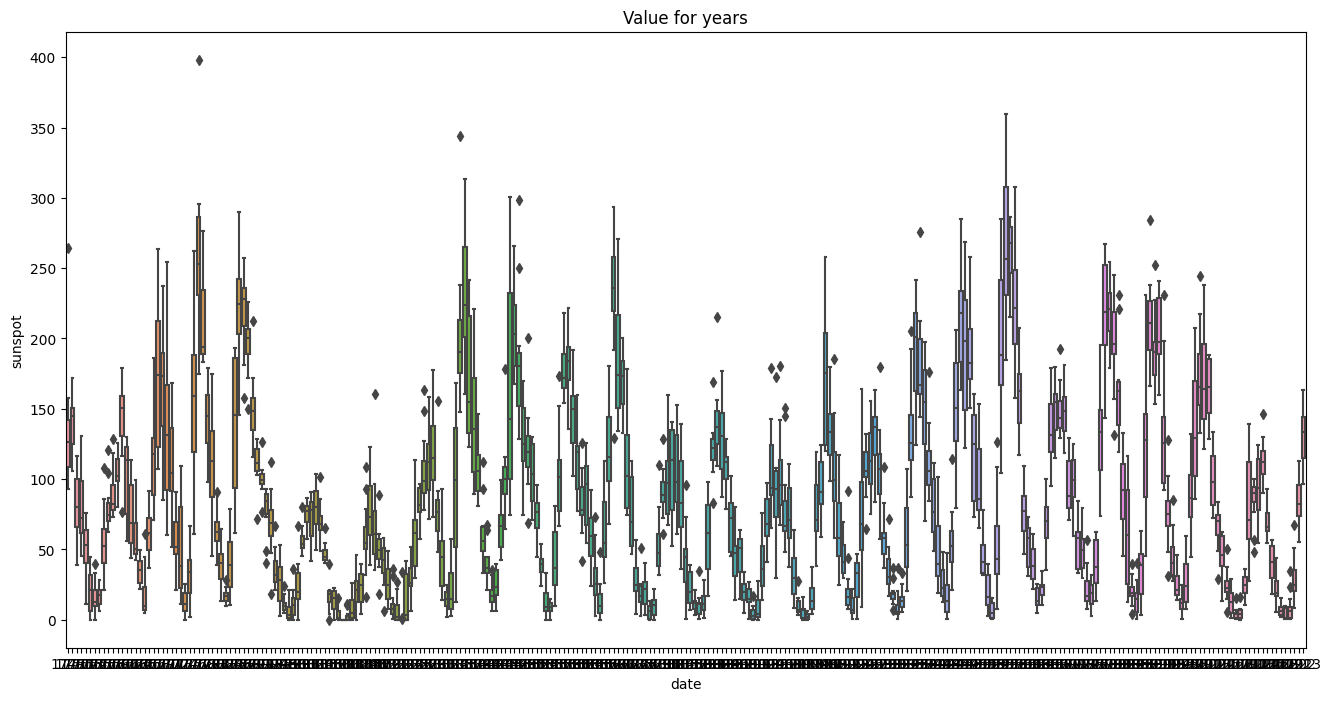

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(16,8))
sns.boxplot(x=df.index.year,y=df.sunspot)
plt.title("Value for years")
plt.xlabel = "Years"
plt.show()

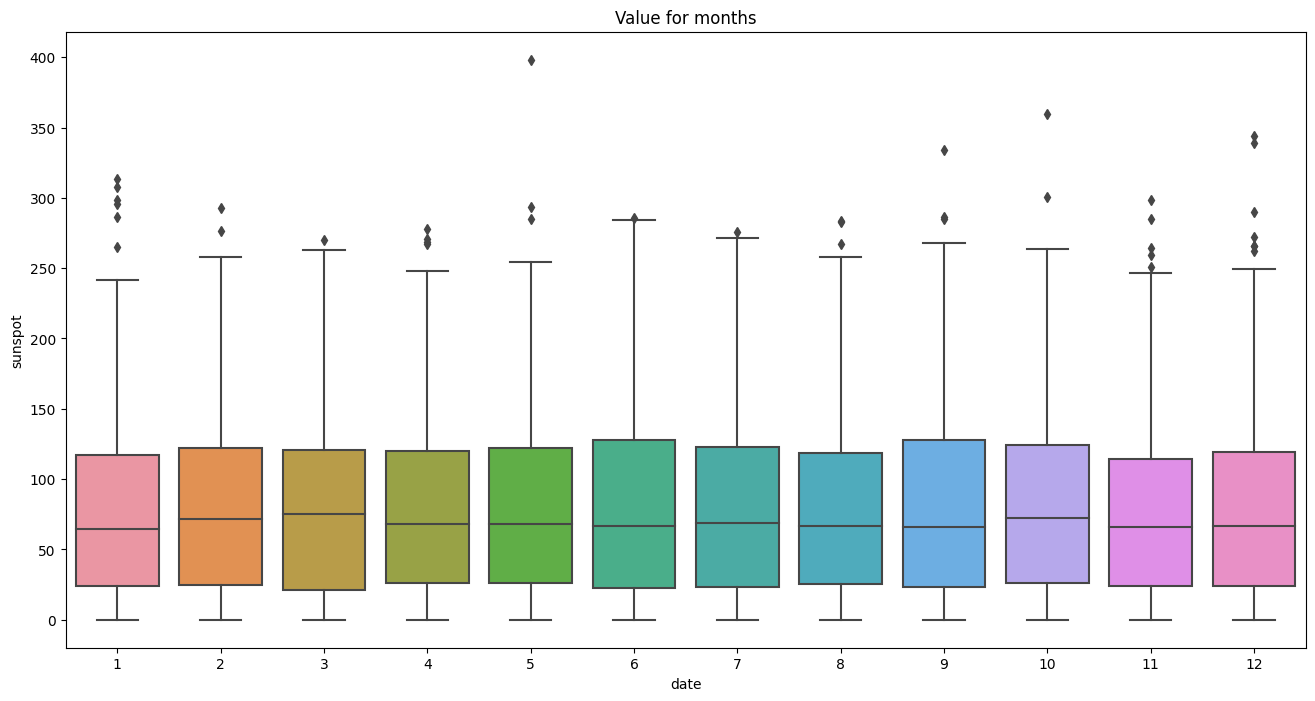

In [24]:
plt.figure(num=None,figsize=(16,8))
sns.boxplot(x=df.index.month,y=df.sunspot)
plt.title("Value for months")
plt.xlabel = "Months"
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["sunspot"].values)
print(f"P-value : {result[1]:.5f}")

P-value : 0.00000


# Task 3

Split the data, for the modeling.

# Task 4

Fit a basic linear regression model on the data.

# Task 5

Use an autoregressive model for forecasting, evaluate its performance! (ARIMA)

Note: using tqdm is an elegant thing, it automatically generates a progressbar based on the cycle ...

In [ ]:
## you can use trange instead of range to be able to monitor progress
from tqdm.notebook import trange



# Task 6

Apply complex modeling method, maximize predictive performance!

“Make a rolling window after shifting the variable by 1 to have X and y” is a very frustrating activity by manually. This should not be done manually, not least because of possible sources of error.

This is where seglearn comes into, which does it all for us.

In [ ]:
!pip install seglearn

In [ ]:
TIME_WINDOW=30
FORECAST_DISTANCE=1

In [ ]:
from seglearn.transform import SegmentXYForecast, last

In [ ]:
## supply the code
segmenter = SegmentXYForecast(...)
X_train_rolled, y_train_rolled, _ = segmenter...

## to check that at least the first sample was correctly created:
assert X_train_rolled[1,-1] == y_train_rolled[0]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

N_ESTIMATORS = 30
RANDOM_STATE = 452543634

In [ ]:
## instantiate and train model
rf = ....

rf....

In [ ]:
from sklearn import metrics

## create sliding window test input and target
X_test_rolled, y_test_rolled,_ = segmenter...

## get predictions for test set
RF_model_predictions = rf...

## print out some metrics
print()
print("Mean abs error:", ...)
print("Explained variance:", ...)